In [192]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [193]:
df =pd.read_excel('shoe.xlsx')

In [194]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


# Data visualization

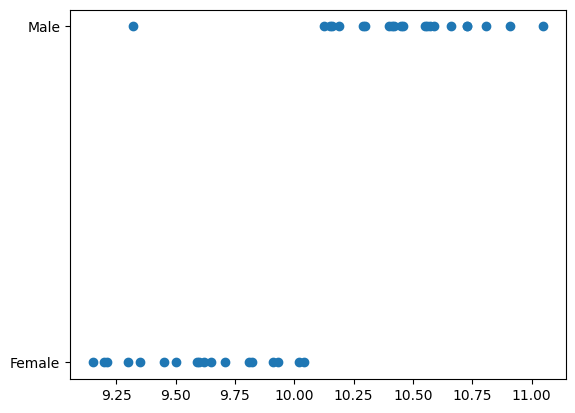

In [195]:
plt.scatter(df['size(cm)'],df['class(y)'])

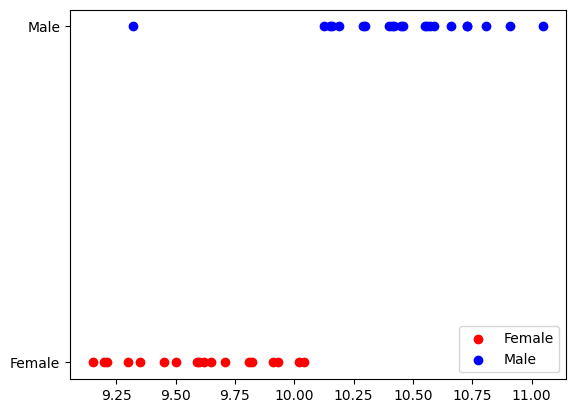

In [196]:
df0 = df[df['class(y)']=='Female']
df1 = df[df['class(y)']=='Male']
plt.scatter(df0['size(cm)'],df0['class(y)'],color='red',label='Female')
plt.scatter(df1['size(cm)'],df1['class(y)'],color='blue',label='Male')
plt.legend()

# Preprocessing

In [197]:
df['class(y)'] = df['class(y)'].replace(['Male','Female'],[1,0])

In [198]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


# Separate X,Y

In [199]:
from sklearn.model_selection import train_test_split as tts

In [200]:
xtrain,xtest,ytrain,ytest = tts(df[['size(cm)']],df['class(y)'],test_size=0.3,random_state=55)

In [201]:
xtrain.head()

,size(cm)
31,9.91
25,10.46
36,9.21
14,10.55
16,10.02


In [202]:
xtest.head()

,size(cm)
22,9.20
3,9.81
2,10.41
38,9.60
6,9.45


In [203]:
ytrain.head()

31    0
25    1
36    0
14    1
16    0
Name: class(y), dtype: int64

In [204]:
ytest.head()

22    0
3     0
2     1
38    0
6     0
Name: class(y), dtype: int64

# Logistic Regression 

In [205]:
from sklearn.linear_model import LogisticRegression

In [206]:
reg1 = LogisticRegression()

In [207]:
reg1.fit(xtrain,ytrain)

LogisticRegression()

In [208]:
m = reg1.coef_

In [209]:
m

array([[2.10745564]])

In [210]:
c = reg1.intercept_

In [211]:
c

array([-20.81422921])

In [212]:
pred = reg1.predict(xtest)

In [213]:
reg1.predict_proba(xtest)

array([[0.80622065, 0.19377935],
       [0.53496519, 0.46503481],
       [0.24519901, 0.75480099],
       [0.64167811, 0.35832189],
       [0.71069738, 0.28930262],
       [0.35975089, 0.64024911],
       [0.47182855, 0.52817145],
       [0.82215406, 0.17784594],
       [0.07776163, 0.92223837],
       [0.2299343 , 0.7700657 ],
       [0.61710592, 0.38289408],
       [0.29058102, 0.70941898]])

# Accuracy

In [214]:
Log_score = reg1.score(xtest,ytest)

In [215]:
Log_score

0.9166666666666666

# MAE

In [113]:
mae1 = mean_absolute_error(ytest,pred)

In [114]:
mae1

0.08333333333333333

# MSE

In [115]:
mse1 = mean_squared_error(ytest,pred)

In [116]:
mse1

0.08333333333333333

# DataFrame

In [117]:
data = {'Name':['Logistic_mae','Logistic_mse','Logistic_accuracy'],
        'Accuracy':[mae1,mse1,Log_score]}
df_after_pred = pd.DataFrame(data=data)

In [118]:
df_after_pred.head()

,Name,Accuracy
0,Logistic_mae,0.083333
1,Logistic_mse,0.083333
2,Logistic_accuracy,0.916667


# BarPlot

In [119]:
import seaborn as sns

<Axes: xlabel='Accuracy', ylabel='Name'>

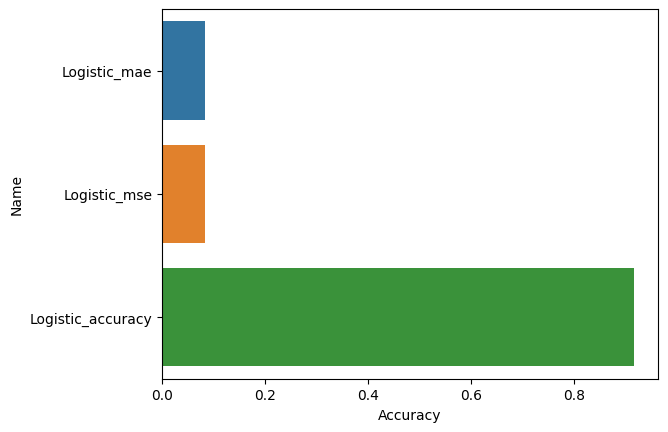

In [120]:
sns.barplot(x='Accuracy',y='Name',data=df_after_pred)

# Decision Tree

In [180]:
from sklearn.tree import DecisionTreeClassifier

In [181]:
reg2 = DecisionTreeClassifier()

In [182]:
reg2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [216]:
pred =reg1.predict(xtest)

In [217]:
pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

# MAE

In [218]:
mae2 = mean_absolute_error(ytest,pred)

In [219]:
mae2

0.08333333333333333

# MSE

In [220]:
mse2 =mean_squared_error(ytest,pred)

In [221]:
mse2

0.08333333333333333

# Accuracy

In [222]:
from sklearn.metrics import  accuracy_score

In [223]:
acc=accuracy_score(ytest,pred)

In [224]:
acc

0.9166666666666666

# DataFrame

In [225]:
data = {'Name':['DecisionTree_mae','DecisionTree_mse','DecisionTree_accuracy'],
        'Accuracy':[mae2,mse2,acc]}
df_after_pred = pd.DataFrame(data=data)

In [226]:
df_after_pred.head()

,Name,Accuracy
0,DecisionTree_mae,0.083333
1,DecisionTree_mse,0.083333
2,DecisionTree_accuracy,0.916667


# Barplot

<Axes: xlabel='Accuracy', ylabel='Name'>

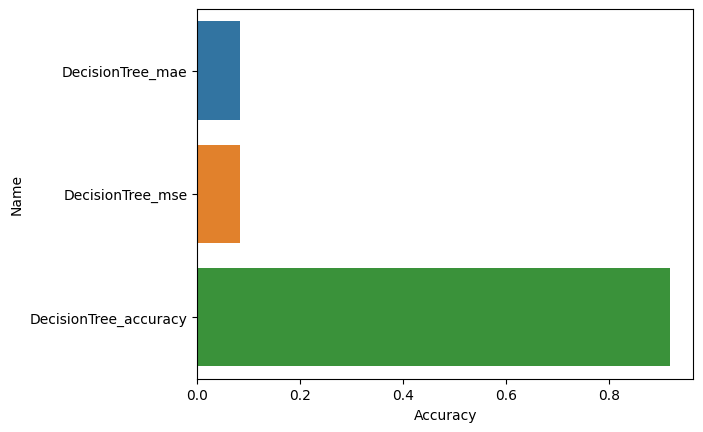

In [227]:
sns.barplot(x='Accuracy',y='Name',data=df_after_pred)

# KNN Regressor

In [228]:
from sklearn.neighbors import KNeighborsRegressor

In [229]:
reg3 = KNeighborsRegressor(n_neighbors=10)

In [230]:
reg3.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=10)

In [231]:
pred = reg3.predict(xtest)

In [232]:
pred

array([0.1, 0.2, 1. , 0.1, 0.1, 0.7, 0.3, 0.1, 1. , 1. , 0.1, 0.9])

# Accuracy

In [233]:
acc1=r2_score(ytest,pred)

In [234]:
acc1

0.9039999999999999

# MAE

In [235]:
mae3 =mean_absolute_error(ytest,pred)

In [236]:
mae3

0.1166666666666667

# MSE

In [237]:
mse3=mean_squared_error(ytest,pred)

In [238]:
mse3

0.02333333333333334

# DataFrame

In [239]:
data = {'Name':['KNN_mae','KNN_mse','KNN_accuracy'],
        'Accuracy':[mae3,mse3,acc1]}
df_after_pred = pd.DataFrame(data=data)

In [240]:
df_after_pred.head()

,Name,Accuracy
0,KNN_mae,0.116667
1,KNN_mse,0.023333
2,KNN_accuracy,0.904000


# Barplot

<Axes: xlabel='Accuracy', ylabel='Name'>

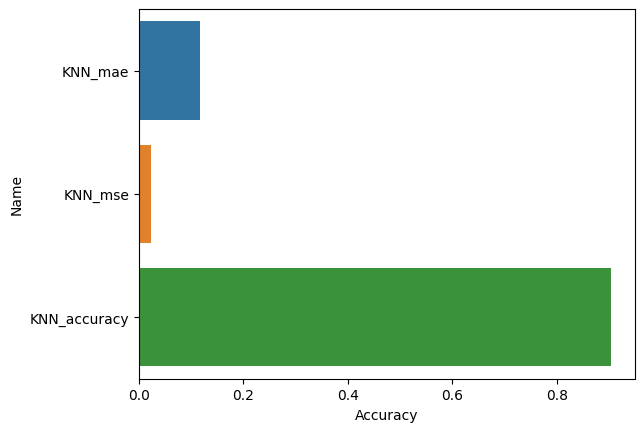

In [241]:
sns.barplot(x='Accuracy',y='Name',data=df_after_pred)

# Compare BarPlot

In [242]:
data = {'Name':['Logistic_Accuracy','KNN_Accuracy','Decison_Accuracy'],
        'Accuracy':[Log_score,acc1,acc]}
df_after_pred = pd.DataFrame(data=data)

In [243]:
df_after_pred.head()

,Name,Accuracy
0,Logistic_Accuracy,0.916667
1,KNN_Accuracy,0.904000
2,Decison_Accuracy,0.916667


<Axes: xlabel='Accuracy', ylabel='Name'>

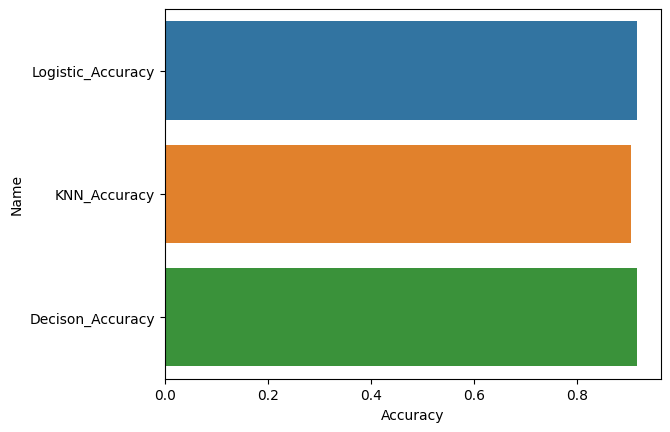

In [244]:
sns.barplot(x='Accuracy',y='Name',data=df_after_pred)